In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "/Users/winirrr/Documents/EventBased_Project/exp_data/exp_0_df.csv"
df = pd.read_csv(file_path)
df = df.iloc[:,1:]

In [3]:
df.head()

,timestamp,x,y,polarity,labels
0,1719472931617899,99,265,0,press
1,1719472931617900,95,452,1,press
2,1719472931617900,93,312,0,press
3,1719472931617901,90,410,0,press
4,1719472931617902,89,315,1,press


In [4]:
X = df.drop(columns=["labels"]).copy()

In [5]:
X.head()

,timestamp,x,y,polarity
0,1719472931617899,99,265,0
1,1719472931617900,95,452,1
2,1719472931617900,93,312,0
3,1719472931617901,90,410,0
4,1719472931617902,89,315,1


In [6]:
# Normalize the DataFrame
def normalize(df):
    result = df.copy()
    for column in df.columns:
        min_value = df[column].min()
        max_value = df[column].max()
        result[column] = (df[column] - min_value) / (max_value - min_value)
    return result

X_normalized = normalize(X)

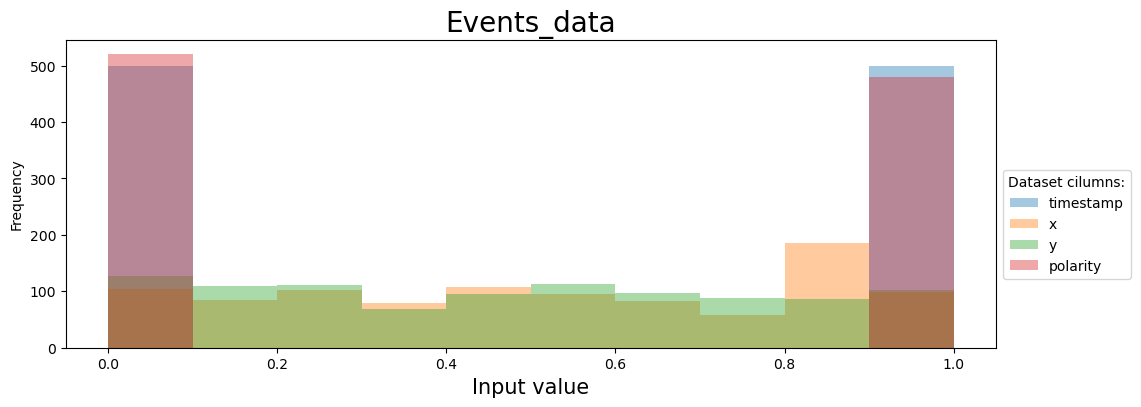

In [7]:
X_normalized.plot.hist(alpha = 0.4, figsize = (12, 4))
plt.legend(title = "Dataset cilumns:" ,bbox_to_anchor = (1.0, 0.6),
                                                   loc = 'upper left')
plt.title('Events_data', fontsize = 20)
plt.xlabel('Input value', fontsize = 15)
plt.show()

In [8]:
import numpy as np
from scipy.stats import norm

def Gaus_neuron(df, n, step, s, max_points=1000000):
    neurons_list = list()
    x_axis_list = list()
    t = 0

    for col in df.columns:
        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)
        
        # Calculate the number of points and limit it to max_points
        num_points = int((max_ - min_) / step)
        if num_points > max_points:
            step = (max_ - min_) / max_points
            num_points = max_points
        
        x_axis = np.linspace(min_, max_, num_points)
        
        # Skip the current column if x_axis is empty
        if x_axis.size == 0:
            continue
        
        x_axis_list.append(np.round(x_axis, 10))
        neurons = np.zeros((n, len(x_axis)))

        for i in range(n):
            loc = (max_ - min_) * (i / (n - 1)) + min_
            neurons[i] = norm.pdf(x_axis, loc, s[t])
            neurons[i] = neurons[i] / np.max(neurons[i])

        neurons_list.append(neurons)
        t += 1

    return neurons_list, x_axis_list

# Example usage
sigm = [0.1, 0.1, 0.2, 0.1]
d = Gaus_neuron(X_normalized, 10, 0.001, sigm)


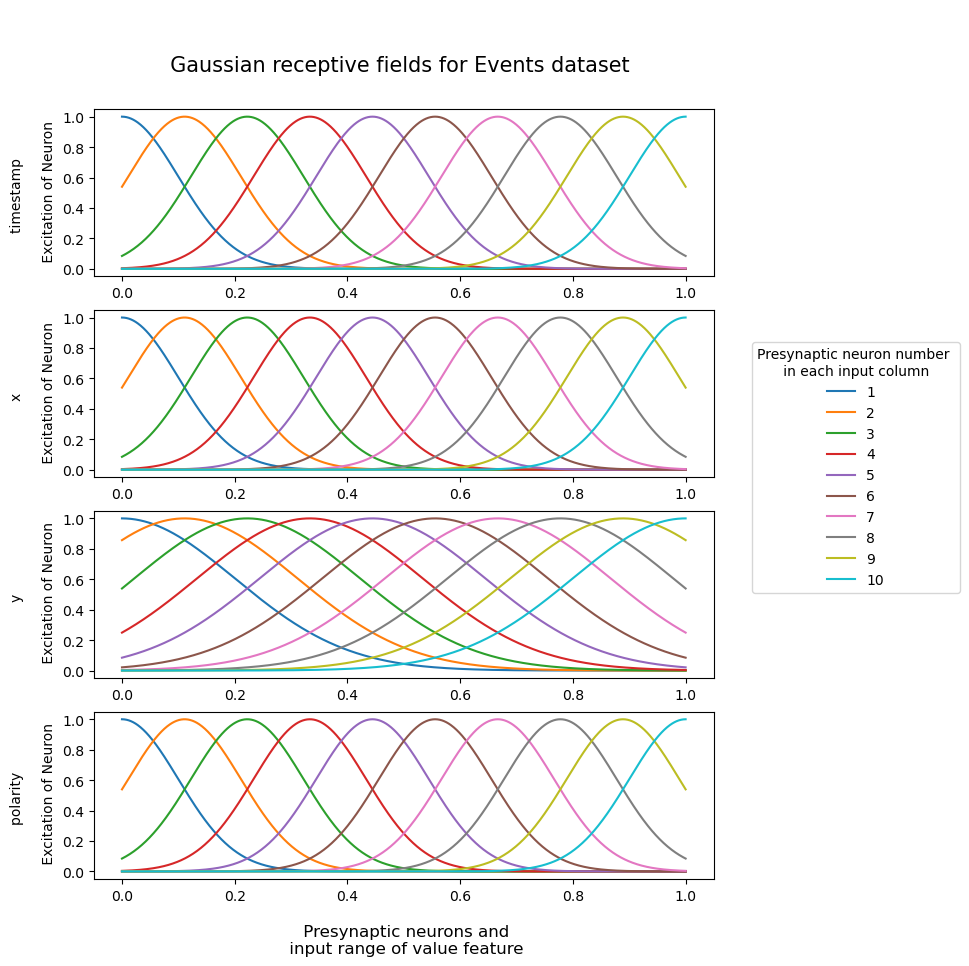

In [9]:
fig, axes = plt.subplots(4, figsize=(8, 10))

k = 0

for ax in axes:

    ax.set(ylabel = f'{X.columns[k]} \n\n Excitation of Neuron')

    for i in range(len(d[0][k])):

        ax.plot(d[1][k], d[0][k][i], label = i + 1)

    k+=1

plt.legend(title = "Presynaptic neuron number \n      in each input column" ,
                            bbox_to_anchor = (1.05, 3.25), loc = 'upper left')
plt.suptitle(' \n\n  Gaussian receptive fields for Events dataset',
                                                                 fontsize = 15)
ax.set_xlabel(' Presynaptic neurons and\n input range of value feature', 
                                                  fontsize = 12, labelpad = 15)

plt.show()


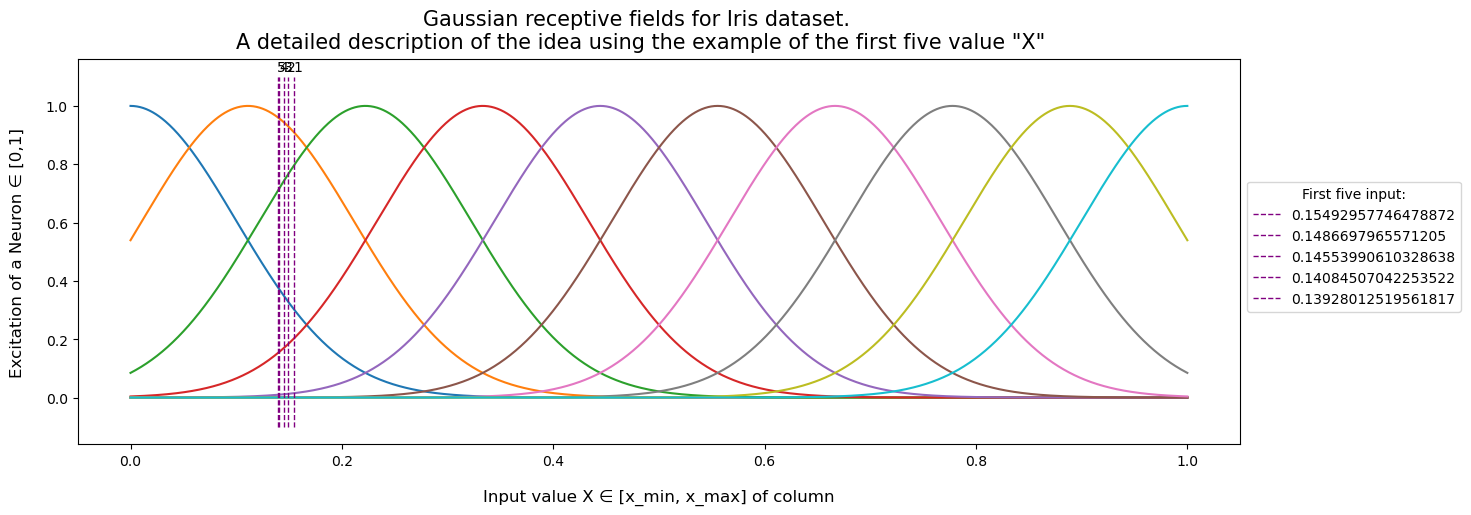

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming d and X_normalized are already defined
x_input = 5
fig, ax = plt.subplots(1)

fig.set_figheight(5)
fig.set_figwidth(15)

ax.set(ylabel=X_normalized.columns[1])

# Plot the Gaussian receptive fields
for i in range(len(d[0][1])):
    ax.plot(d[1][1], d[0][1][i])

# Plot the input points and lines
for n in range(x_input):
    x_value = X_normalized['x'][n]
    y_values = d[0][1][:, d[1][1] == x_value]

    # Only plot if there are matching y_values
    if y_values.size > 0:
        plt.plot(np.tile(x_value, y_values.shape), y_values, 'ro', markersize=4)
    
    plt.vlines(x=x_value, ymin=-0.1, ymax=1.1, colors='purple', ls='--', lw=1, label=str(x_value))
    plt.text(x_value * 0.997, 1.12, n + 1, size=10)

plt.legend(title="First five input:", bbox_to_anchor=(1.0, 0.7), loc='upper left')

plt.suptitle('Gaussian receptive fields for Events dataset. \n'
             'A detailed description of the idea using the example of the first five value "X"',
             fontsize=15)

ax.set_xlabel('Input value X ∈ [x_min, x_max] of column', fontsize=12, labelpad=15)
ax.set_ylabel('Excitation of a Neuron ∈ [0,1]', fontsize=12, labelpad=15)

plt.show()


In [13]:
import numpy as np

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
five_x = np.zeros((5, 10))

for n in range(x_input):
    mask = d[1][1] == X_normalized['x'][n]
    matching_values = d[0][1][:, mask]
    
    # Handle cases with no matching values
    if matching_values.size > 0:
        if matching_values.shape[1] >= 10:
            five_x[n, :] = matching_values[:, :10]
        else:
            five_x[n, :matching_values.shape[1]] = matching_values

five_x


array([[0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000]])

In [14]:
five_x = np.where(five_x > 0.1, 1 - five_x, np.nan)
five_x[five_x == 0] = 0.0001
five_x

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

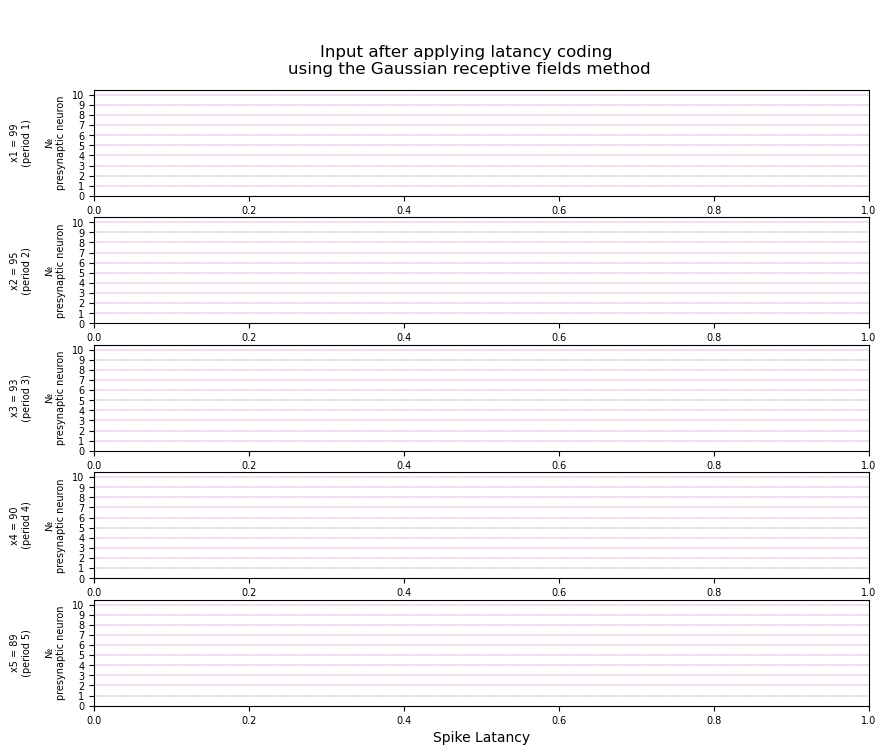

In [16]:
fig, ax = plt.subplots(5, figsize=(10, 8))

for i in range(5):
    ax[i].scatter(x = five_x[i], y = np.arange(1, 10 + 1), s = 10, color = 'black')
    ax[i].hlines(xmin = 0, xmax=1, y=np.arange(1, 11, 1),
               colors = 'purple', ls = '--', lw = 0.25)
    ax[i].yaxis.set_ticks(np.arange(0, 11, 1))
    ax[i].set_ylabel(f'x{i+1} = {X.iloc[i,1]}\n (period {i+1}) \n\n № \npresynaptic neuron',
                                                                  fontsize = 7)
    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 10 * 1.05)
    ax[i].tick_params(labelsize = 7)

ax[i].set_xlabel('Spike Latancy')
plt.suptitle(' \n\nInput after applying latancy coding \nusing the Gaussian receptive fields method', 
                                                                 fontsize = 12)
plt.show()